In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
constructors = pd.read_csv(r"E:\f1project\f1app\data\constructors.csv", sep=',', encoding='utf-8')
drivers = pd.read_csv(r"E:\f1project\f1app\data\drivers.csv", sep=';', encoding='utf-8')
races = pd.read_csv(r"E:\f1project\f1app\data\races.csv", sep=';', encoding='utf-8')
results = pd.read_csv(r"E:\f1project\f1app\data\results.csv", sep=';', encoding='latin-1')


In [3]:
#merge datasets
df = pd.merge(results, races[["raceId", "year", "name", "round"]], on="raceId", how="left")
df = pd.merge(df, drivers[["driverId", "driverRef", "nationality"]], on = "driverId", how="left")
df = pd.merge(df, constructors[["constructorId", "name", "nationality"]], on="constructorId", how="left")
print(df)

       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
25394     25400    1073       815              9     11     4       15   
25395     25401    1073       849              3      6    16       \N   
25396     25402    1073       841             51     99    14       \N   
25397     25403    1073       847              3     63    17       \N   
25398     25404    1073         8             51      7    18       \N   

      positionText  positionOrder points  ...  fastestLapTime fastestLapSpeed  \
0                1            

In [4]:
df.drop(["number", "position", "positionText", "laps", "fastestLap", "statusId", "resultId", "driverId", "constructorId"], axis=1, inplace = True)
print(df)

       raceId  grid  positionOrder points         time milliseconds rank  \
0          18     1              1     10  1:34:50.616      5690616    2   
1          18     5              2      8       +5.478      5696094    3   
2          18     7              3      6       +8.163      5698779    5   
3          18    11              4      5      +17.181      5707797    7   
4          18     3              5      4      +18.014      5708630    1   
...       ...   ...            ...    ...          ...          ...  ...   
25394    1073     4             15      0           \N           \N    2   
25395    1073    16             16      0           \N           \N   15   
25396    1073    14             17      0           \N           \N   16   
25397    1073    17             18      0           \N           \N   19   
25398    1073    18             19      0           \N           \N   18   

      fastestLapTime fastestLapSpeed  year                 name_x  round  \
0          

In [5]:
#rename columns
df.rename(columns={"rank":"fastestLapRank", "name_x":"gpName", "nationality_x":"driverNationality", "name_y":"constructorName", "nationality_y":"constructorNationality", "driverRef":"driver"}, inplace = True)

In [6]:
#rearrange the columns
df = df[["year", "raceId", "gpName", "round", "driver", "constructorName", "grid", "positionOrder", "points", "time", "milliseconds", "fastestLapRank", "fastestLapTime", "fastestLapSpeed", "driverNationality", "constructorNationality"]]
print(df)

       year  raceId                 gpName  round      driver constructorName  \
0      2008      18  Australian Grand Prix      1    hamilton         McLaren   
1      2008      18  Australian Grand Prix      1    heidfeld      BMW Sauber   
2      2008      18  Australian Grand Prix      1     rosberg        Williams   
3      2008      18  Australian Grand Prix      1      alonso         Renault   
4      2008      18  Australian Grand Prix      1  kovalainen         McLaren   
...     ...     ...                    ...    ...         ...             ...   
25394  2021    1073   Abu Dhabi Grand Prix     22       perez        Red Bull   
25395  2021    1073   Abu Dhabi Grand Prix     22      latifi        Williams   
25396  2021    1073   Abu Dhabi Grand Prix     22  giovinazzi      Alfa Romeo   
25397  2021    1073   Abu Dhabi Grand Prix     22     russell        Williams   
25398  2021    1073   Abu Dhabi Grand Prix     22   raikkonen      Alfa Romeo   

       grid  positionOrder 

In [7]:
#drop incomplete seasons
df = df[df["year"]!=2021]
df = df[df["year"]!=2022]

In [8]:
#sort values
df = df.sort_values(by=["year", "round", "positionOrder"], ascending = [False, True, True])

In [9]:
#replace \N values
df.time.replace("\\N", np.nan, inplace = True)
df.milliseconds.replace("\\N", np.nan, inplace = True)
df.fastestLapRank.replace("\\N", np.nan, inplace = True)
df.fastestLapTime.replace("\\N", np.nan, inplace = True)
df.fastestLapSpeed.replace("\\N", np.nan, inplace = True)

In [10]:
#change datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [11]:
#reset index
df.reset_index(drop=True, inplace = True)

In [12]:
#shape
print(df.shape)

(24960, 16)


In [13]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24960 entries, 0 to 24959
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24960 non-null  int64  
 1   raceId                  24960 non-null  int64  
 2   gpName                  24960 non-null  object 
 3   round                   24960 non-null  int64  
 4   driver                  24960 non-null  object 
 5   constructorName         24960 non-null  object 
 6   grid                    24960 non-null  int64  
 7   positionOrder           24960 non-null  int64  
 8   points                  24960 non-null  object 
 9   time                    6592 non-null   object 
 10  milliseconds            6591 non-null   float64
 11  fastestLapRank          6711 non-null   float64
 12  fastestLapTime          6550 non-null   object 
 13  fastestLapSpeed         6550 non-null   float64
 14  driverNationality       24960 non-null

In [14]:
#head
df.head(10)

,year,raceId,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2020,1031,Austrian Grand Prix,1,bottas,Mercedes,1,1,25,1:30:55.739,5455739.0,2.0,1:17:57,229.758,Finnish,German
1,2020,1031,Austrian Grand Prix,1,leclerc,Ferrari,7,2,18,+2.700,5458439.0,4.0,1:22:01,228.933,Monegasque,Italian
2,2020,1031,Austrian Grand Prix,1,norris,McLaren,3,3,16,+5.491,5461230.0,1.0,1:14:55,230.378,British,British
3,2020,1031,Austrian Grand Prix,1,hamilton,Mercedes,5,4,12,+5.689,5461428.0,3.0,1:18:52,229.572,British,German
4,2020,1031,Austrian Grand Prix,1,sainz,McLaren,8,5,10,+8.903,5464642.0,5.0,1:23:14,228.687,Spanish,British
5,2020,1031,Austrian Grand Prix,1,perez,Racing Point,6,6,8,+15.092,5470831.0,6.0,1:13:05,227.579,Mexican,British
6,2020,1031,Austrian Grand Prix,1,gasly,AlphaTauri,12,7,6,+16.682,5472421.0,11.0,1:09:025,225.205,French,Italian
7,2020,1031,Austrian Grand Prix,1,ocon,Renault,14,8,4,+17.456,5473195.0,10.0,1:23:32,225.509,French,French
8,2020,1031,Austrian Grand Prix,1,giovinazzi,Alfa Romeo,18,9,2,+21.146,5476885.0,9.0,1:21:16,225.954,Italian,Swiss
9,2020,1031,Austrian Grand Prix,1,vettel,Ferrari,11,10,1,+24.545,5480284.0,8.0,1:18:23,226.524,German,Italian


In [15]:
plt.rcParams["figure.figsize"]=10,6

([], [])

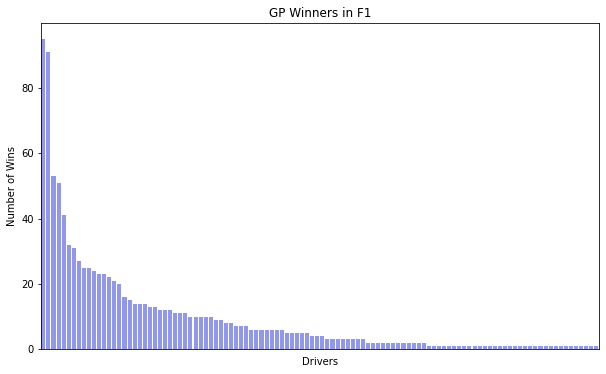

In [16]:
#Gp Winners
gp_winners = df.loc[df["positionOrder"]==1].groupby("driver")["positionOrder"].count().sort_values(ascending=False).to_frame().reset_index()

#Barplot of all winners
sb.barplot(data=gp_winners, x ="driver", y="positionOrder", color="#636efa", alpha=0.8)
plt.title("GP Winners in F1")
plt.xlabel("Drivers")
plt.ylabel("Number of Wins")
plt.xticks([])

In [17]:
#create new dataframe of top 10 Gp Winners
top_ten = gp_winners.head(10)
print(top_ten)

       driver  positionOrder
0    hamilton             95
1  schumacher             91
2      vettel             53
3       prost             51
4       senna             41
5      alonso             32
6     mansell             31
7     stewart             27
8       clark             25
9       lauda             25


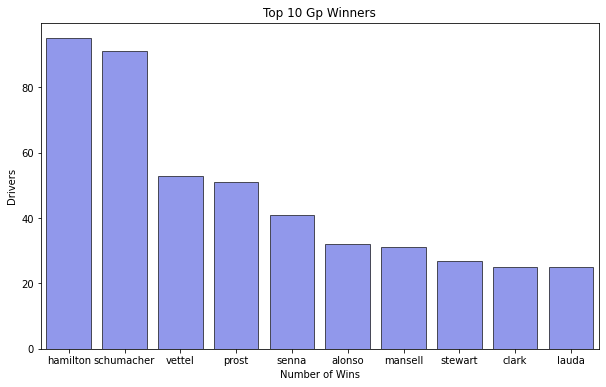

In [18]:
sb.barplot(data = top_ten, x = "driver", y="positionOrder", color="#636efa", alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title("Top 10 Gp Winners")
plt.ylabel("Drivers")
plt.xlabel("Number of Wins")
plt.savefig("top10winners.png")

In [23]:
#format the fastest lap times
df['fastestLapTime'] = pd.to_timedelta(df.fastestLapTime)#, format='%M:%S:%f')
df['fastestLapTime'] = df['fastestLapTime'].astype(str).apply(lambda x: x.split(' ')[-1])
df.head(30)

,year,raceId,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2020,1031,Austrian Grand Prix,1,bottas,Mercedes,1,1,25,1:30:55.739,5455739.0,2.0,01:17:57,229.758,Finnish,German
1,2020,1031,Austrian Grand Prix,1,leclerc,Ferrari,7,2,18,+2.700,5458439.0,4.0,01:22:01,228.933,Monegasque,Italian
2,2020,1031,Austrian Grand Prix,1,norris,McLaren,3,3,16,+5.491,5461230.0,1.0,01:14:55,230.378,British,British
3,2020,1031,Austrian Grand Prix,1,hamilton,Mercedes,5,4,12,+5.689,5461428.0,3.0,01:18:52,229.572,British,German
4,2020,1031,Austrian Grand Prix,1,sainz,McLaren,8,5,10,+8.903,5464642.0,5.0,01:23:14,228.687,Spanish,British
5,2020,1031,Austrian Grand Prix,1,perez,Racing Point,6,6,8,+15.092,5470831.0,6.0,01:13:05,227.579,Mexican,British
6,2020,1031,Austrian Grand Prix,1,gasly,AlphaTauri,12,7,6,+16.682,5472421.0,11.0,01:09:25,225.205,French,Italian
7,2020,1031,Austrian Grand Prix,1,ocon,Renault,14,8,4,+17.456,5473195.0,10.0,01:23:32,225.509,French,French
8,2020,1031,Austrian Grand Prix,1,giovinazzi,Alfa Romeo,18,9,2,+21.146,5476885.0,9.0,01:21:16,225.954,Italian,Swiss
9,2020,1031,Austrian Grand Prix,1,vettel,Ferrari,11,10,1,+24.545,5480284.0,8.0,01:18:23,226.524,German,Italian


C:\Users\karli\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\karli\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\karli\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\karli\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


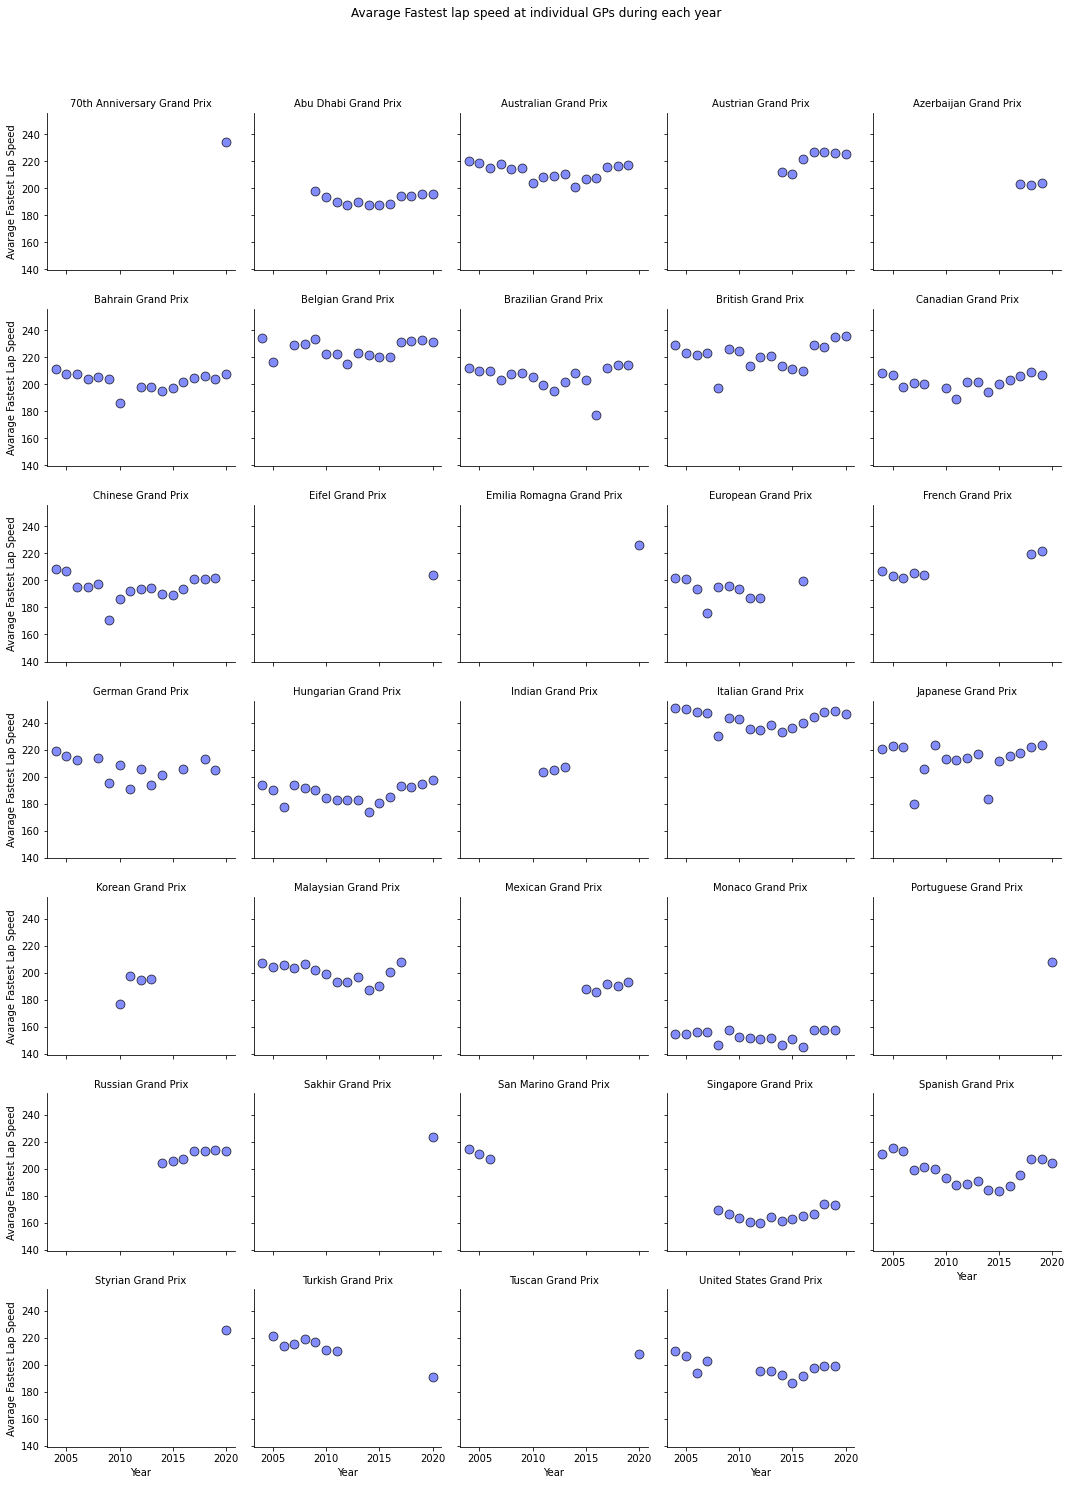

In [25]:
#new data frame for seasons 2004 and onwards
df_speed = df[df["year"]>=2004]
df_group_speed = df_speed.groupby(["gpName", "year"])["fastestLapSpeed"].mean().to_frame().reset_index()

#create the facetgrid
fg = sb.FacetGrid(data = df_group_speed, col = "gpName", col_wrap = 5)
fg.map(plt.scatter, "year", "fastestLapSpeed", alpha = 0.8, color="#636efa", linewidth = 0.8, edgecolor = "black", s = 80)
fg.set_titles("{col_name}")
fg.set_xlabels("Year")
fg.set_ylabels("Avarage Fastest Lap Speed")
plt.subplots_adjust(top=0.91)
fg.fig.suptitle("Avarage Fastest lap speed at individual GPs during each year")
plt.savefig("avgspeed.png")

In [26]:
#points per race ratio
pilot = drivers.merge(results, on="driverId", how="left")
best_drivers = pilot[["surname", "points", "raceId"]]
best_drivers = best_drivers.groupby("surname")["raceId"].nunique().sort_values(ascending=False).reset_index(name="races")
best_drivers = best_drivers[best_drivers["races"] >= 1 ]
pilot["points"] = pd.to_numeric(pilot["points"],   errors='coerce')
ppr = lambda x: (x.points.sum())/(x.raceId.nunique())
best_ppr = pilot[pilot["surname"].isin(best_drivers.surname)].groupby("surname").apply(ppr).sort_values(ascending=False).reset_index(name = "points_per_race")
best_ppr.head(10)

,surname,points_per_race
0,Hamilton,14.215017
1,Vettel,10.932143
2,Bottas,9.709497
3,Leclerc,6.913580
4,Verstappen,6.338710
5,Ricciardo,6.066667
6,Alonso,5.892857
7,Fangio,5.529412
8,Schumacher,5.368272
9,Räikkönen,5.321023


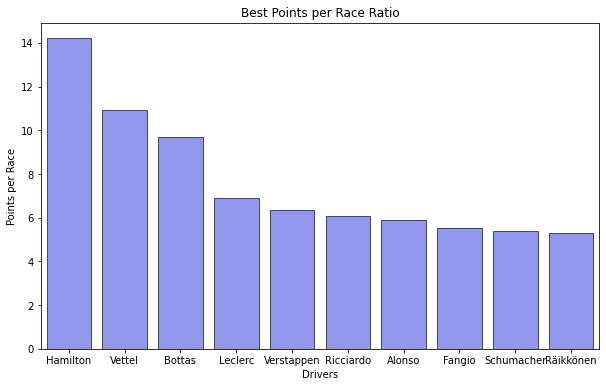

In [27]:
prr_plot = best_ppr.head(10)
fig = sb.barplot (data=prr_plot, x="surname", y="points_per_race", color="#636efa", alpha=0.8, linewidth=.8, edgecolor="black").figure
plt.title("Best Points per Race Ratio")
plt.xlabel("Drivers")
plt.ylabel("Points per Race")
plt.savefig("points_per_race.png")

In [87]:
race_wins = drivers.merge(results,left_on='driverId',right_on='driverId',how = 'left')
race_wins = race_wins[['surname','positionOrder']]

# grouping by surname and counting the number of races won
highest_rw = race_wins[race_wins['positionOrder'] == 1.0].groupby('surname').count().sort_values(
    'positionOrder', ascending = False).reset_index()

wpr = best_drivers.merge(highest_rw, on="surname", how = 'left')
wpr["success"] = (wpr["positionOrder"]/wpr["races"])*100
wpr.sort_values(by=['success'], inplace=True, ascending=False)
wpr.head(10)

,surname,races,positionOrder,success
550,Wallard,2,1.0,50.000000
146,Fangio,51,24.0,47.058824
198,Ascari,32,13.0,40.625000
438,Vukovich,5,2.0,40.000000
7,Hamilton,293,103.0,35.153584
114,Clark,72,25.0,34.722222
0,Schumacher,353,97.0,27.478754
75,Stewart,101,27.0,26.732673
24,Prost,202,51.0,25.247525
118,Moss,67,16.0,23.880597


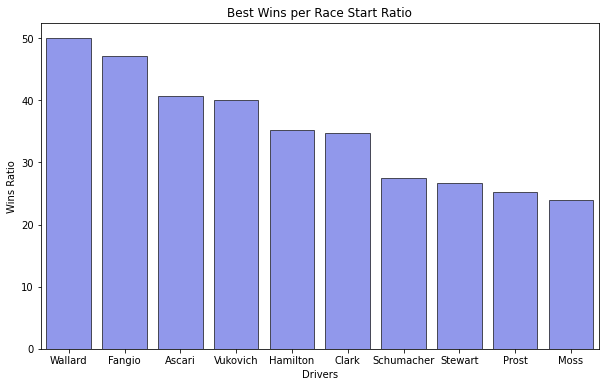

In [88]:
wpr_plot = wpr.head(10)
fig = sb.barplot (data=wpr_plot, x="surname", y="success", color="#636efa", alpha=0.8, linewidth=.8, edgecolor="black").figure
plt.title("Best Wins per Race Start Ratio")
plt.xlabel("Drivers")
plt.ylabel("Wins Ratio")
plt.savefig("win_ratio.png")